STEP 2: PATHWAY ENRICHMENT VALIDATION

Please upload 4 files:
  1. GSE43292.all_genes_with_stats.tsv (from Step 1)
  2. GSE20950.all_genes_with_stats.tsv (from Step 1)
  3. GSE43292_gProfiler_intersections.csv (from g:Profiler)
  4. GSE20950_gProfiler_intersections.csv (from g:Profiler)


Saving GSE43292.all_genes_with_stats.tsv to GSE43292.all_genes_with_stats.tsv
Saving GSE20950.all_genes_with_stats.tsv to GSE20950.all_genes_with_stats.tsv
Saving GSE20950_gProfiler_hsapiens_2026. 2. 14. 오후 3-27-33__intersections.csv to GSE20950_gProfiler_hsapiens_2026. 2. 14. 오후 3-27-33__intersections.csv
Saving GSE43292_gProfiler_hsapiens_2026. 2. 14. 오후 3-08-31__intersections.csv to GSE43292_gProfiler_hsapiens_2026. 2. 14. 오후 3-08-31__intersections.csv

Identified files:
GSE43292:
  stats: GSE43292.all_genes_with_stats.tsv
  gprofiler: GSE43292_gProfiler_hsapiens_2026. 2. 14. 오후 3-08-31__intersections.csv
GSE20950:
  stats: GSE20950.all_genes_with_stats.tsv
  gprofiler: GSE20950_gProfiler_hsapiens_2026. 2. 14. 오후 3-27-33__intersections.csv

DATA PREPROCESSING

GSE43292:
  Initial: 19036 rows
  After QC: 19036 unique genes
  DEGs: 877 (↑508 ↓369)

GSE20950:
  Initial: 20848 rows
  After QC: 20846 unique genes
  DEGs: 1997 (↑178 ↓1819)

GLOBAL KEGG ENRICHMENT RESULTS

GSE4

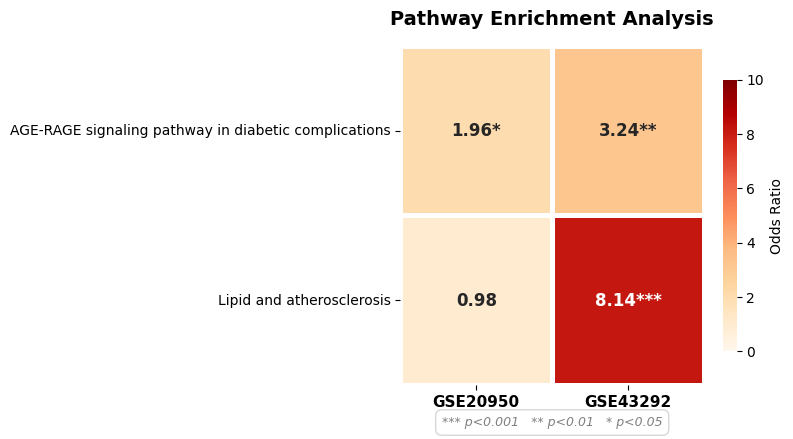


CREATING GENE EXPRESSION HEATMAPS
  ✓ Saved: Fig_gene_expression_KEGG_04933.png


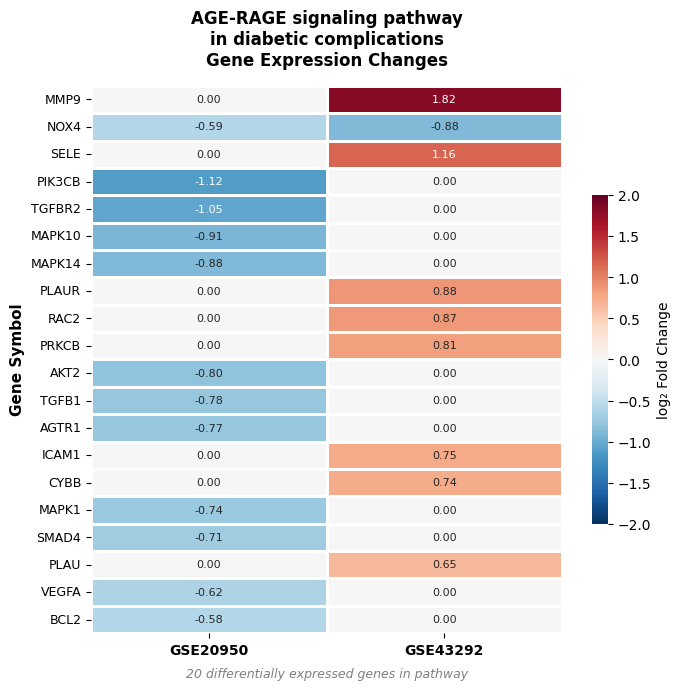

  ✓ Saved: Fig_gene_expression_KEGG_05417.png


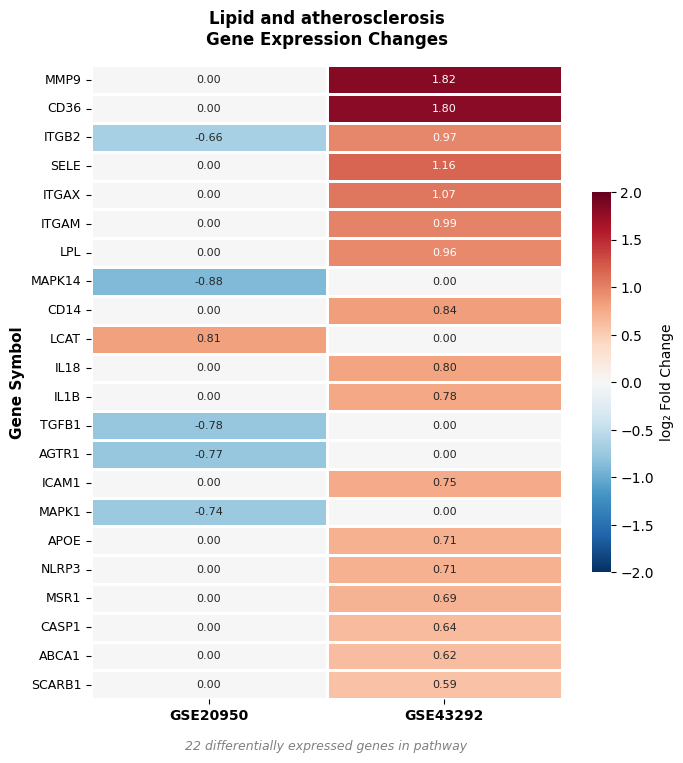


DOWNLOADING RESULTS


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  ✓ Fig_enrichment_heatmap.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  ✓ Fig_gene_expression_KEGG_04933.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  ✓ Fig_gene_expression_KEGG_05417.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  ✓ Table_publication_ready.tsv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  ✓ KEGG_ORA_GSE43292_full.tsv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  ✓ KEGG_ORA_GSE20950_full.tsv

ANALYSIS COMPLETE

Generated 6 files:
  - 3 figures (PNG)
  - 3 tables (TSV)


In [1]:
"""
================================================================================
Step 2: Pathway Enrichment Validation in GSE Datasets
================================================================================

Validates AGE-RAGE and lipid/atherosclerosis pathway enrichment through
integrated global and targeted statistical analysis.

Input:
  - Preprocessed stats files (from Step 1)
  - g:Profiler KEGG results (from web tool)

Output:
  - Global pathway rankings (all KEGG pathways)
  - Targeted enrichment statistics (Fisher's exact test)
  - Enrichment heatmap and gene expression heatmaps

Author: Jihong Oh
Email: jihong421@gmail.com
Date: February 2026
================================================================================
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import fisher_exact
from google.colab import files as colab_files
import warnings
warnings.filterwarnings('ignore')

# Configuration
ADJ_P_THRESHOLD = 0.01
LOGFC_THRESHOLD = 0.58

TARGET_PATHWAYS = {
    'KEGG:04933': 'AGE-RAGE signaling pathway in diabetic complications',
    'KEGG:05417': 'Lipid and atherosclerosis'
}

# Pathway gene sets (KEGG database, February 2026)
PATHWAY_GENES = {
    'KEGG:04933': [
        "AGER", "VEGFA", "IL6", "TNF", "VCAM1", "ICAM1", "CCL2", "SELE",
        "SELP", "NOS3", "EDN1", "F3", "SERPINE1", "PLAU", "PLAUR", "MMP2",
        "MMP9", "COL1A1", "COL1A2", "COL3A1", "COL4A1", "COL4A2", "FN1",
        "STAT3", "JAK2", "MAPK14", "MAPK1", "MAPK3", "MAPK8", "MAPK9",
        "MAPK10", "PIK3CA", "PIK3CB", "PIK3CD", "PIK3R1", "PIK3R2", "PIK3R3",
        "AKT1", "AKT2", "AKT3", "NFKB1", "NFKB2", "RELA", "RELB", "JUN",
        "FOS", "PRKCB", "PRKCZ", "PLA2G4A", "CYBB", "NOX1", "NOX4", "RAC1",
        "RAC2", "S100B", "S100A12", "HMGB1", "AGT", "AGTR1", "ACE", "REN",
        "CASP3", "BAX", "BCL2", "SMAD2", "SMAD3", "SMAD4", "TGFB1", "TGFBR1",
        "TGFBR2"
    ],
    'KEGG:05417': [
        "APOE", "APOB", "APOA1", "APOC3", "LDLR", "PCSK9", "LCAT", "CETP",
        "LIPC", "LPL", "ABCA1", "ABCG1", "CD36", "OLR1", "MSR1", "SCARB1",
        "IL1B", "IL6", "TNF", "CCL2", "CXCL8", "VCAM1", "ICAM1", "SELE",
        "MMP1", "MMP2", "MMP3", "MMP9", "CTSG", "ELANE", "ITGAM", "ITGAX",
        "ITGB2", "TLR2", "TLR4", "CD14", "NLRP3", "PYCARD", "CASP1", "IL18",
        "NFKB1", "RELA", "MAPK1", "MAPK3", "MAPK8", "MAPK14", "JUN", "FOS",
        "NOS3", "NOS2", "EDN1", "AGT", "ACE", "AGTR1", "PDGFA", "PDGFB",
        "PDGFRA", "PDGFRB", "TGFB1", "SMAD2", "SMAD3", "COL1A1", "COL3A1", "FN1"
    ]
}

# Visualization settings
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10

COLORS = {
    'up': '#D32F2F',
    'down': '#1976D2',
    'heatmap_or': 'OrRd'
}

print("="*80)
print("STEP 2: PATHWAY ENRICHMENT VALIDATION")
print("="*80)
print("\nPlease upload 4 files:")
print("  1. GSE43292.all_genes_with_stats.tsv (from Step 1)")
print("  2. GSE20950.all_genes_with_stats.tsv (from Step 1)")
print("  3. GSE43292_gProfiler_intersections.csv (from g:Profiler)")
print("  4. GSE20950_gProfiler_intersections.csv (from g:Profiler)")

uploaded = colab_files.upload()

# ============================================================================
# File Identification
# ============================================================================

def identify_files(file_list):
    """Identify uploaded files by pattern matching"""
    files_dict = {
        'GSE43292': {'stats': None, 'gprofiler': None},
        'GSE20950': {'stats': None, 'gprofiler': None}
    }

    for fname in file_list:
        if '43292' in fname:
            files_dict['GSE43292']['stats' if fname.endswith('.tsv') else 'gprofiler'] = fname
        elif '20950' in fname:
            files_dict['GSE20950']['stats' if fname.endswith('.tsv') else 'gprofiler'] = fname

    return files_dict

file_mapping = identify_files(uploaded.keys())

print("\nIdentified files:")
for dataset, finfo in file_mapping.items():
    print(f"{dataset}:")
    for ftype, fname in finfo.items():
        print(f"  {ftype}: {fname or 'MISSING'}")

# ============================================================================
# Data Preprocessing
# ============================================================================

print("\n" + "="*80)
print("DATA PREPROCESSING")
print("="*80)

def load_and_process_deg(stats_file, dataset_name):
    """Load and preprocess DEG data"""
    print(f"\n{dataset_name}:")

    df = pd.read_csv(stats_file, sep='\t')
    print(f"  Initial: {len(df)} rows")

    # Clean
    df = df[df['Gene.symbol'].notna()]
    df = df[df['Gene.symbol'] != '']
    df = df[~df['Gene.symbol'].str.contains('///', na=False)]
    df['Gene.symbol'] = df['Gene.symbol'].str.strip().str.upper()
    df = df[~df['Gene.symbol'].str.match(r'^\d+$')]

    # Deduplicate
    df = df.sort_values('adj.P.Val').groupby('Gene.symbol').first().reset_index()
    print(f"  After QC: {len(df)} unique genes")

    # Filter DEGs
    deg_df = df[
        (df['adj.P.Val'] < ADJ_P_THRESHOLD) &
        (df['logFC'].abs() > LOGFC_THRESHOLD)
    ].copy()
    deg_df['Regulation'] = deg_df['logFC'].apply(lambda x: 'Up' if x > 0 else 'Down')

    print(f"  DEGs: {len(deg_df)} (↑{sum(deg_df['Regulation']=='Up')} ↓{sum(deg_df['Regulation']=='Down')})")

    return sorted(df['Gene.symbol'].unique()), deg_df

datasets_data = {}
for dataset_id in ['GSE43292', 'GSE20950']:
    if file_mapping[dataset_id]['stats']:
        bg, deg = load_and_process_deg(file_mapping[dataset_id]['stats'], dataset_id)
        datasets_data[dataset_id] = {'background': bg, 'deg_data': deg}

# ============================================================================
# Process g:Profiler Results
# ============================================================================

print("\n" + "="*80)
print("GLOBAL KEGG ENRICHMENT RESULTS")
print("="*80)

def process_gprofiler(gprofiler_file, dataset_name):
    """Extract and clean g:Profiler KEGG results"""
    print(f"\n{dataset_name}:")

    df = pd.read_csv(gprofiler_file)
    df = df[df['source'] == 'KEGG'].copy()
    df = df[df['term_id'] != 'KEGG:00000'].copy()  # Remove KEGG root

    df = df.rename(columns={
        'adjusted_p_value': 'p_value',
        'intersections': 'intersections'
    })

    df['gene_ratio'] = df['intersection_size'] / df['term_size']
    df['neg_log10_pval'] = -np.log10(df['p_value'].replace(0, 1e-300))
    df = df.sort_values('p_value').reset_index(drop=True)
    df['rank'] = df.index + 1

    result = df[[
        'rank', 'term_id', 'term_name', 'intersection_size', 'term_size',
        'gene_ratio', 'p_value', 'neg_log10_pval', 'intersections'
    ]].copy()

    print(f"  Total KEGG pathways: {len(result)}")

    # Check target pathways
    for pid, pname in TARGET_PATHWAYS.items():
        match = result[result['term_id'] == pid]
        if len(match) > 0:
            row = match.iloc[0]
            print(f"  {pid}: Rank #{row['rank']}, p={row['p_value']:.2e}")

    return result

gprofiler_results = {}
for dataset_id in ['GSE43292', 'GSE20950']:
    if file_mapping[dataset_id]['gprofiler']:
        results = process_gprofiler(file_mapping[dataset_id]['gprofiler'], dataset_id)
        gprofiler_results[dataset_id] = results

        # Save full results
        output_file = f"KEGG_ORA_{dataset_id}_full.tsv"
        results.to_csv(output_file, sep='\t', index=False)
        print(f"  Saved: {output_file}")

# ============================================================================
# Targeted Fisher's Exact Test
# ============================================================================

print("\n" + "="*80)
print("TARGETED PATHWAY ENRICHMENT")
print("="*80)

def fisher_ora(deg_data, background, pathway_genes, pathway_id, pathway_name, dataset):
    """Perform one-tailed Fisher's exact test"""

    pathway_set = set([g.upper() for g in pathway_genes])
    deg_set = set(deg_data['Gene.symbol'].str.upper())
    bg_set = set([g.upper() for g in background])

    pathway_in_bg = pathway_set & bg_set
    overlap = deg_set & pathway_set

    if len(overlap) == 0:
        return None

    # Contingency table
    total = len(bg_set)
    a = len(overlap)
    b = len(deg_set) - a
    c = len(pathway_in_bg) - a
    d = total - a - b - c

    odds_ratio, p_value = fisher_exact([[a, b], [c, d]], alternative='greater')

    overlap_df = deg_data[deg_data['Gene.symbol'].str.upper().isin(overlap)].copy()

    print(f"\n{dataset} - {pathway_id}:")
    print(f"  Overlap: {len(overlap)}/{len(pathway_in_bg)}")
    print(f"  OR: {odds_ratio:.2f}, p: {p_value:.2e}")

    return {
        'dataset': dataset,
        'pathway_id': pathway_id,
        'pathway_name': pathway_name,
        'overlap_size': len(overlap),
        'pathway_size_bg': len(pathway_in_bg),
        'up_count': sum(overlap_df['Regulation'] == 'Up'),
        'down_count': sum(overlap_df['Regulation'] == 'Down'),
        'odds_ratio': odds_ratio,
        'p_value': p_value
    }, overlap_df

targeted_results = []

for dataset_id in ['GSE43292', 'GSE20950']:
    if dataset_id not in datasets_data:
        continue

    for pathway_id, pathway_name in TARGET_PATHWAYS.items():
        result = fisher_ora(
            datasets_data[dataset_id]['deg_data'],
            datasets_data[dataset_id]['background'],
            PATHWAY_GENES[pathway_id],
            pathway_id, pathway_name, dataset_id
        )

        if result:
            targeted_results.append(result[0])

# ============================================================================
# Create Integrated Results Table
# ============================================================================

print("\n" + "="*80)
print("CREATING PUBLICATION TABLE")
print("="*80)

integrated = []

for dataset_id in ['GSE43292', 'GSE20950']:
    for pathway_id, pathway_name in TARGET_PATHWAYS.items():
        row = {
            'Dataset': dataset_id,
            'Pathway': pathway_name.split()[0],
            'Global Rank': '—',
            'Global p': '—',
            'Overlap': '—',
            'Regulation': '—',
            'OR': '—',
            'Fisher p': '—',
            'Sig': ''
        }

        # Global results
        if dataset_id in gprofiler_results:
            match = gprofiler_results[dataset_id][
                gprofiler_results[dataset_id]['term_id'] == pathway_id
            ]
            if len(match) > 0:
                r = match.iloc[0]
                row['Global Rank'] = f"#{r['rank']}"
                row['Global p'] = f"{r['p_value']:.2e}"

        # Targeted results
        t_match = [r for r in targeted_results
                   if r['dataset'] == dataset_id and r['pathway_id'] == pathway_id]
        if t_match:
            t = t_match[0]
            row['Overlap'] = f"{t['overlap_size']}/{t['pathway_size_bg']}"
            row['Regulation'] = f"↑{t['up_count']} ↓{t['down_count']}"
            row['OR'] = f"{t['odds_ratio']:.2f}"
            row['Fisher p'] = f"{t['p_value']:.2e}"

            if t['p_value'] < 0.001:
                row['Sig'] = '***'
            elif t['p_value'] < 0.01:
                row['Sig'] = '**'
            elif t['p_value'] < 0.05:
                row['Sig'] = '*'

        integrated.append(row)

pub_table = pd.DataFrame(integrated)
pub_table.to_csv('Table_publication_ready.tsv', sep='\t', index=False)

print("\n" + pub_table.to_string(index=False))
print("\n✓ Saved: Table_publication_ready.tsv")

# ============================================================================
# Visualization 1: Enrichment Heatmap
# ============================================================================

print("\n" + "="*80)
print("CREATING ENRICHMENT HEATMAP")
print("="*80)

heatmap_data = []
for _, row in pub_table.iterrows():
    or_val = float(row['OR']) if row['OR'] != '—' else 1.0
    sig = row['Sig']
    annot = f"{or_val:.2f}{sig}" if or_val != 1.0 else "—"

    heatmap_data.append({
        'Dataset': row['Dataset'],
        'Pathway': TARGET_PATHWAYS[
            'KEGG:04933' if 'AGE' in row['Pathway'] else 'KEGG:05417'
        ],
        'OR': or_val,
        'Annotation': annot
    })

df_heat = pd.DataFrame(heatmap_data)
pivot_or = df_heat.pivot(index='Pathway', columns='Dataset', values='OR')
pivot_annot = df_heat.pivot(index='Pathway', columns='Dataset', values='Annotation')

fig, ax = plt.subplots(figsize=(8, 4.5))

sns.heatmap(pivot_or, annot=pivot_annot, fmt='',
            cmap=COLORS['heatmap_or'],
            cbar_kws={'label': 'Odds Ratio', 'shrink': 0.8},
            linewidths=2.5, linecolor='white',
            vmin=0, vmax=max(10, pivot_or.max().max()),
            annot_kws={'fontsize': 12, 'fontweight': 'bold'},
            ax=ax)

ax.set_title('Pathway Enrichment Analysis', fontweight='bold', fontsize=14, pad=15)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center',
                   fontweight='bold', fontsize=11)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right', fontsize=10)

ax.text(0.5, -0.12, '*** p<0.001   ** p<0.01   * p<0.05',
       transform=ax.transAxes, ha='center', fontsize=9,
       style='italic', color='gray',
       bbox=dict(boxstyle='round,pad=0.5', facecolor='white',
                edgecolor='lightgray', alpha=0.9))

plt.tight_layout()
plt.savefig('Fig_enrichment_heatmap.png', dpi=300, bbox_inches='tight')
print("✓ Saved: Fig_enrichment_heatmap.png")
plt.show()

# ============================================================================
# Visualization 2: Gene Expression Heatmaps
# ============================================================================

print("\n" + "="*80)
print("CREATING GENE EXPRESSION HEATMAPS")
print("="*80)

def create_gene_heatmap(datasets_data, pathway_genes, pathway_name, pathway_id):
    """Create gene-level expression heatmap"""

    expr_data = []

    for dataset_id in ['GSE43292', 'GSE20950']:
        if dataset_id not in datasets_data:
            continue

        deg_data = datasets_data[dataset_id]['deg_data']
        pathway_set = set([g.upper() for g in pathway_genes])
        deg_genes = deg_data[deg_data['Gene.symbol'].str.upper().isin(pathway_set)]

        for _, row in deg_genes.iterrows():
            expr_data.append({
                'Gene': row['Gene.symbol'],
                'Dataset': dataset_id,
                'logFC': row['logFC']
            })

    if len(expr_data) == 0:
        print(f"  No DEGs for {pathway_name}")
        return

    df_expr = pd.DataFrame(expr_data)
    pivot_expr = df_expr.pivot(index='Gene', columns='Dataset', values='logFC')
    pivot_expr = pivot_expr.fillna(0)

    # Sort by total absolute change
    pivot_expr['total_abs'] = pivot_expr.abs().sum(axis=1)
    pivot_expr = pivot_expr.sort_values('total_abs', ascending=False).drop('total_abs', axis=1)

    # Create heatmap
    n_genes = len(pivot_expr)
    fig_height = max(6, min(n_genes * 0.35, 15))

    fig, ax = plt.subplots(figsize=(7, fig_height))

    sns.heatmap(pivot_expr, cmap='RdBu_r', center=0, vmin=-2, vmax=2,
                cbar_kws={'label': 'log₂ Fold Change', 'shrink': 0.6},
                linewidths=1, linecolor='white',
                annot=True, fmt='.2f', annot_kws={'fontsize': 8},
                ax=ax)

    title = pathway_name.replace(' in ', '\nin ')
    ax.set_title(f'{title}\nGene Expression Changes',
                fontweight='bold', fontsize=12, pad=15)
    ax.set_xlabel('')
    ax.set_ylabel('Gene Symbol', fontweight='bold', fontsize=11)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=9)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontweight='bold', fontsize=10)

    ax.text(0.5, -0.08, f'{n_genes} differentially expressed genes in pathway',
           transform=ax.transAxes, ha='center', fontsize=9,
           style='italic', color='gray')

    plt.tight_layout()

    safe_name = pathway_id.replace(':', '_')
    output = f'Fig_gene_expression_{safe_name}.png'
    plt.savefig(output, dpi=300, bbox_inches='tight')
    print(f"  ✓ Saved: {output}")
    plt.show()

# Generate heatmaps
create_gene_heatmap(datasets_data, PATHWAY_GENES['KEGG:04933'],
                    'AGE-RAGE signaling pathway in diabetic complications',
                    'KEGG:04933')

create_gene_heatmap(datasets_data, PATHWAY_GENES['KEGG:05417'],
                    'Lipid and atherosclerosis',
                    'KEGG:05417')

# ============================================================================
# Download Results
# ============================================================================

print("\n" + "="*80)
print("DOWNLOADING RESULTS")
print("="*80)

output_files = [
    'Fig_enrichment_heatmap.png',
    'Fig_gene_expression_KEGG_04933.png',
    'Fig_gene_expression_KEGG_05417.png',
    'Table_publication_ready.tsv',
    'KEGG_ORA_GSE43292_full.tsv',
    'KEGG_ORA_GSE20950_full.tsv'
]

for fname in output_files:
    try:
        colab_files.download(fname)
        print(f"  ✓ {fname}")
    except Exception as e:
        print(f"  ✗ {fname}: {e}")

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)
print("\nGenerated 6 files:")
print("  - 3 figures (PNG)")
print("  - 3 tables (TSV)")